In [1]:
#importing some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#create dataframe and read csv data from github

MCI = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
MCI

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Checking the number of rows and columns in the dataset

MCI.shape

#This way also we can find the numbe of rows and column in the dataset
#print("Number of rows:- ",MCI.shape[0])
#print("Number of columns:- ",MCI.shape[1])

(1338, 7)

In [4]:
# first 5 rows from Dataset or write the any number in breacket if you want

MCI.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Last 5 rows from Dataset or write the any number in breacket if you want

MCI.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
#Checking the columns of the dataset

MCI.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
#Getting the information of dataset ( All information about the columns/about your data )

MCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Checking the null values

MCI.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#Statistical summary of the dataset

MCI.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Here we see the only 4 column summary. because those are numerical columns.

Sex, Smoker, Region are categorical columns.

### Checking unique label and value counts from the categorical column.

In [10]:
#Checking unique labels from 'sex' column

MCI['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
#Checking the value counts of the 'sex' variables

print(MCI.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


In [12]:
#Checking unique labels from 'smoker' column

MCI['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
#Checking the value counts of the 'smoker' variables

print(MCI.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [14]:
#Checking unique labels from 'region' column

MCI['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
#Checking the value counts of the 'region' variables

print(MCI.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


## Data Visualization

### Visualizing the countplot in categorical columns

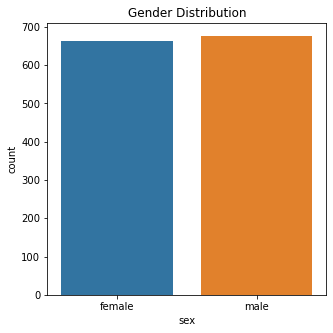

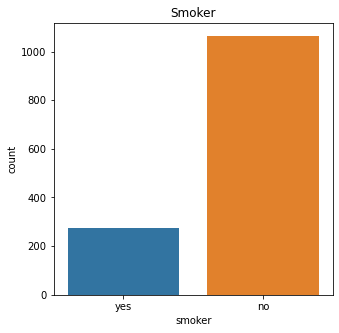

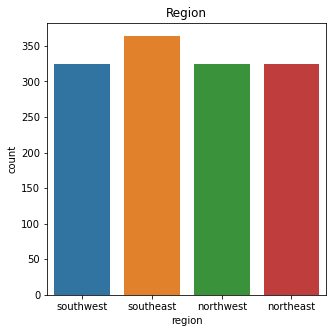

In [16]:
#Visualizing Gender distribution in sex column using countplot

plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=MCI)
plt.title('Gender Distribution')
plt.show()


#Visualizing smoker column using countplot

plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=MCI)
plt.title('Smoker')
plt.show()


#Visualizing region column using countplot

plt.figure(figsize=(5,5))
sns.countplot(x='region', data=MCI)
plt.title('Region')
plt.show()

1) Males are normally high in count of Female in Gendre distribution (Sex).

2) Non Smoker are high in count of smoker.

3) Southeast region is high in count of southwest, northwest and northeast in Region.

## Visualizing the barplot in categorical column with target variable

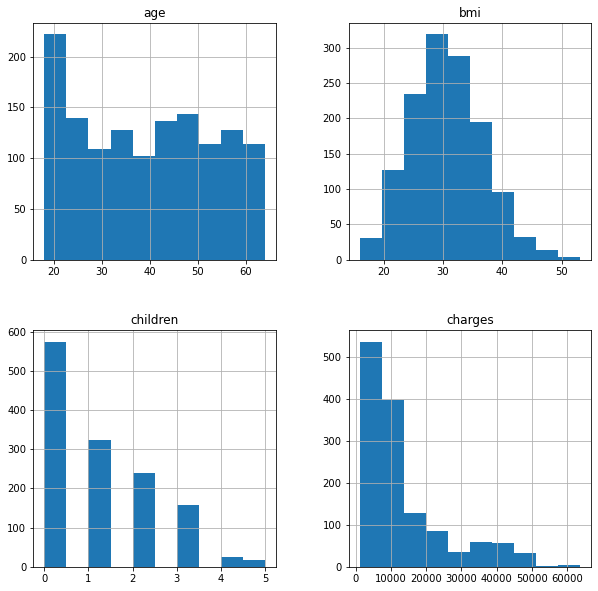

In [17]:
#Visualizing the histogram for each numerical column

MCI.hist(bins=10, figsize=(10,10))
plt.show()

Here we see the histogram of the all numerical columns.

<Figure size 216x216 with 0 Axes>

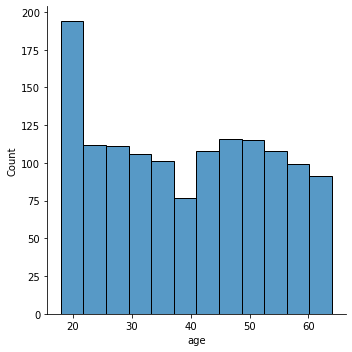

<Figure size 216x216 with 0 Axes>

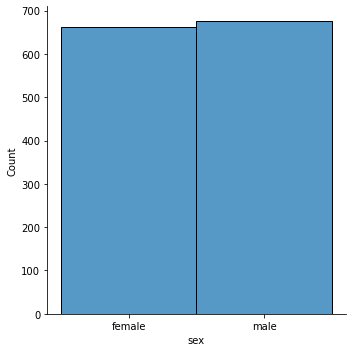

<Figure size 216x216 with 0 Axes>

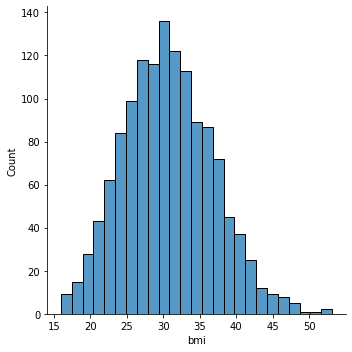

<Figure size 216x216 with 0 Axes>

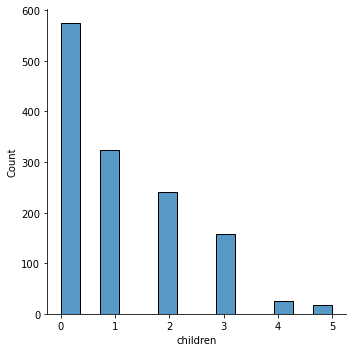

<Figure size 216x216 with 0 Axes>

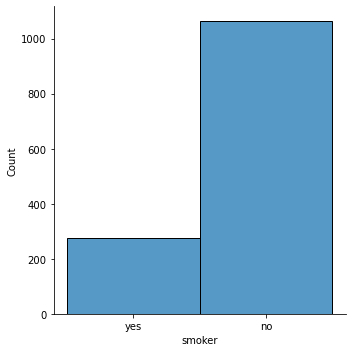

<Figure size 216x216 with 0 Axes>

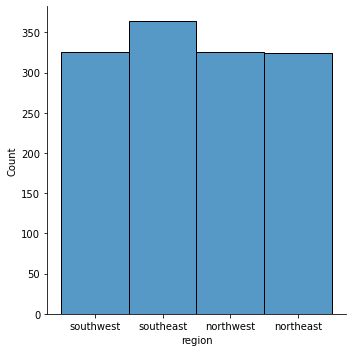

<Figure size 216x216 with 0 Axes>

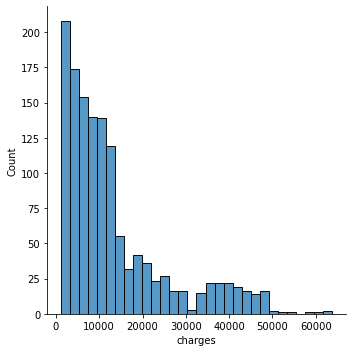

In [18]:
#Visualize the all columns using distplot 

plt.figure(figsize=(3,3))
sns.displot(data=MCI, x = 'age')

plt.figure(figsize=(3,3))
sns.displot(data=MCI, x = 'sex')

plt.figure(figsize=(3,3))
sns.displot(data=MCI, x = 'bmi')

plt.figure(figsize=(3,3))
sns.displot(data=MCI, x = 'children')

plt.figure(figsize=(3,3))
sns.displot(data=MCI, x = 'smoker')

plt.figure(figsize=(3,3))
sns.displot(data=MCI, x = 'region')

plt.figure(figsize=(3,3))
sns.displot(data=MCI, x = 'charges')

Here we see the displot of all Columns.

## Check the value counts of each column

In [19]:
#Checking the value counts of the age variables

print(MCI.age.value_counts())

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


In [20]:
#Checking the value counts of the sex variables

print(MCI.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


In [21]:
#Checking the value counts of the bmi variables

print(MCI.bmi.value_counts())

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


In [22]:
#Checking the value counts of the childern variables

print(MCI.children.value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [23]:
#Checking the value counts of the smoker variables

print(MCI.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [24]:
#Checking the value counts of the region variables

print(MCI.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [25]:
#Checking the value counts of the charges variables

print(MCI.charges.value_counts())

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


## Convert categorical column to numerical column

In [26]:
MCI.replace({'sex':{'male':0, 'female':1}}, inplace=True)
MCI.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
MCI.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':4}}, inplace=True)

In [27]:
MCI.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


## Correlation between all numerical variables

In [28]:
MCI.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.005509,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.010443,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.239601,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,-0.005659,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.028745,-0.787251
region,0.005509,0.010443,-0.239601,-0.005659,0.028745,1.000000,-0.028181
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.028181,1.000000


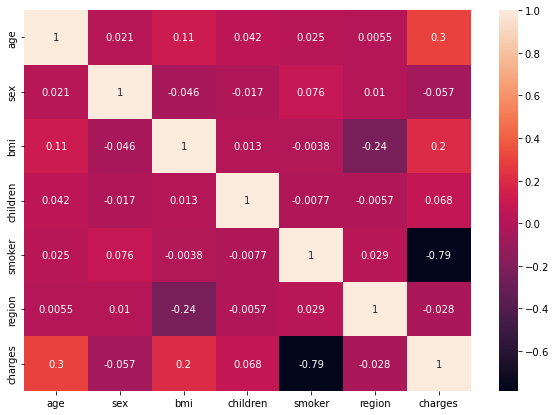

In [29]:
#Correlation of each column using heatmap.

plt.figure(figsize=(10,7))
sns.heatmap(MCI.corr(), annot = True)
plt.show()

## Now seprating the variables into x and y

In [39]:
x = MCI.drop(['charges','sex'], axis=1)
y = MCI['charges']

In [40]:
x

,age,bmi,children,smoker,region
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,2
4,32,28.880,0,1,2
...,...,...,...,...,...
1333,50,30.970,3,1,2
1334,18,31.920,0,1,4
1335,18,36.850,0,1,0
1336,21,25.800,0,1,1


In [41]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Creating train test split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state=2)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (936, 5)
x_test shape:  (402, 5)
y_train shape:  (936,)
x_test shape:  (402, 5)


In [44]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
y_pred

array([ 2.01904471e+03,  1.19088236e+04,  1.04809300e+04,  2.34255732e+03,
        8.30702721e+03,  1.11574525e+04,  3.40687777e+03,  1.22417592e+03,
        1.17312532e+04,  9.46176329e+03,  1.12320313e+04,  5.08118070e+03,
        2.92316517e+04, -4.02744881e+02,  1.29157831e+04,  1.30916251e+04,
        4.28816865e+03,  7.80234738e+03,  2.88303749e+04,  2.96520732e+03,
        1.21373862e+04,  2.29379744e+03,  3.40820372e+04,  3.16368274e+04,
        2.99676794e+04,  8.74505635e+03,  2.37641180e+03,  1.54366101e+04,
        6.66469505e+03,  1.83499711e+03,  9.50572153e+03,  5.68395981e+03,
        4.38468750e+03,  4.82191084e+03,  9.58190037e+03,  4.77021038e+03,
        2.95473369e+04,  6.76433281e+03,  2.72428387e+04,  1.38180948e+04,
        9.14675443e+01,  2.79599129e+04,  7.54787427e+03,  1.47106417e+03,
        1.02835853e+04,  8.08926094e+03,  1.14039655e+04,  8.33993852e+03,
        1.10253321e+04,  1.37566174e+04,  6.53028200e+03, -7.81208995e+02,
        2.56621724e+04,  

In [45]:
from sklearn.metrics import r2_score

print("R2 score : ",(r2_score(y_test,y_pred)))

R2 score :  0.7661991120397695


## Let's visualize scatterplot of y_test and y_pred

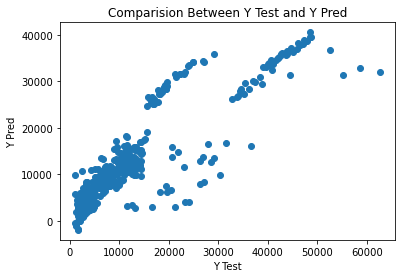

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.title('Comparision Between Y Test and Y Pred')
plt.show()

## Checking the non smoker medical insurance cost 

In [50]:
NS_data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
non_smoker = pd.DataFrame(NS_data, index)
non_smoker

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [51]:
cost_pred = lg.predict(non_smoker)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [9757.13698644]


## Checking the smoker medical insurance cost

In [53]:
Smoker_data = {'age':19, 'bmi':27.9, 'children':0, 'smoker':0, 'region':1}
index = [0]
smoker = pd.DataFrame(Smoker_data, index)
smoker

,age,bmi,children,smoker,region
0,19,27.9,0,0,1


In [54]:
cost_pred = lg.predict(smoker)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [25078.22697274]
